In [335]:
#modules
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import copy

In [336]:
def read_images_from_folder(folder_name):
    """ returns a list of images in RGB format"""
    """ R: 0-255, G:0-255, B:0-255 """
    images = []
    if os.path.isdir(folder_name):
        for filename in os.listdir(folder_name):
            img_path = os.path.join(folder_name, filename)
            img = cv2.imread(img_path) # default BGR format
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #conversion in RGB
            images.append(img)
        return images
    else:
        raise Exception("folder_name does not exist")

In [354]:
def shadow_remover(image):
    """takes an RGB image in input and apply adaptive gaussian filter to remove shadow"""
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
    
    #draw original image
    axes[0].imshow(image)
    axes[0].set_title("original image")
    
    #splitting channels
    r, g, b = cv2.split(image)
    
    #applying gaussian blur on r channel
    blurred_r = cv2.GaussianBlur(r,(11,11),0)
    
    #creating mask of pixels on which we want to apply filter
    mask_1 = r < 80  # red color pixel intensity less than 80
    mask_2 = r < blurred_r # pixel intensity less than adaptive thresold
    mask = np.logical_and(mask_1, mask_2) 
    
    #apply mask on all three channels
    r[mask] = 0 #replaces shadow area with 0
    g[mask] = 0 #replace shadow area with 0
    b[mask] = 0 #replace shadow area with 0
    
    #draw modified image
    modified_image = cv2.merge((r,g,b))
    axes[1].imshow(modified_image)
    axes[1].set_title("final image")

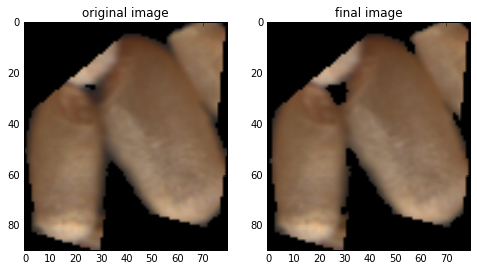

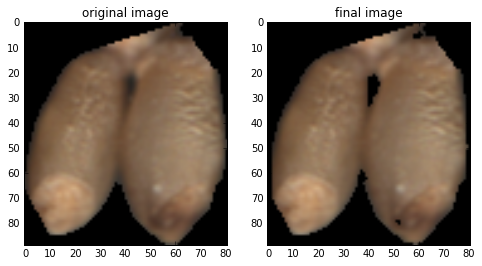

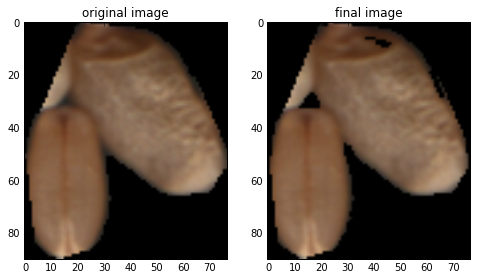

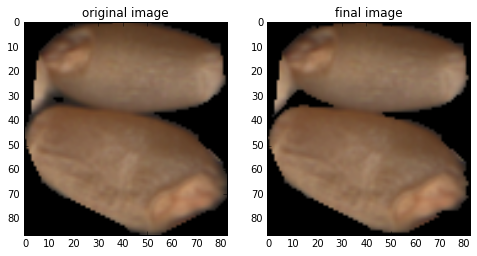

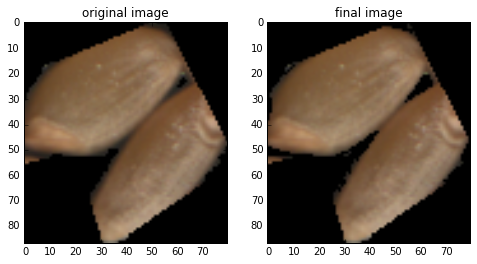

In [355]:
# Read all images
images = read_images_from_folder('images')

#remove shadow
for img in images:
    shadow_remover(img)